6219
17330
1772


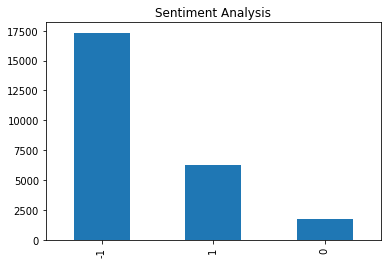

In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline


data = pd.read_csv(r'C:\Users\MONSTER\Desktop\3.1dönem\makina öğrenmesi proje\nisan_2020.csv') 
data.Sentiment_Analysis.value_counts().plot(kind='bar',title="Sentiment Analysis")

print((data['Sentiment_Analysis'].values == 1).sum())
print((data['Sentiment_Analysis'].values == -1).sum())
print((data['Sentiment_Analysis'].values == 0).sum())

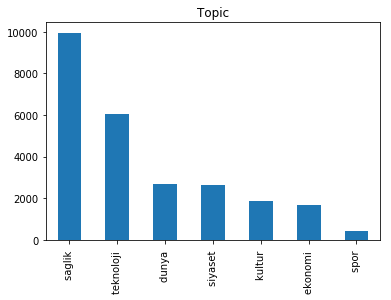

In [14]:
data.Topic.value_counts().plot(kind='bar',title="Topic")

In [1]:
### SVM 

import pandas as pd



data = pd.read_csv(r'C:\Users\MONSTER\Desktop\3.1dönem\makina öğrenmesi proje\nisan_2020.csv') 

label=data[["Sentiment_Analysis"]].values

features=data[["Description"]]

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer(analyzer="word",lowercase=True)
sentence_train_vector=vectorizer.fit_transform(data.iloc[:,0].astype(str))

features=sentence_train_vector

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features,label,test_size=0.25,random_state=0)

from sklearn.svm import SVC
svc=SVC(kernel='poly')
svc.fit(x_train,y_train)
result=svc.predict(x_test)

from sklearn.metrics import confusion_matrix 
cm=confusion_matrix(y_test,result)
print(cm)

from sklearn.metrics import accuracy_score,classification_report
accuracy=accuracy_score(y_test,result)
print(accuracy)

print(classification_report(y_test,result))

D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[[4339   13   14]
 [ 366   73   19]
 [1128    4  375]]
0.7561206760385405
              precision    recall  f1-score   support

          -1       0.74      0.99      0.85      4366
           0       0.81      0.16      0.27       458
           1       0.92      0.25      0.39      1507

    accuracy                           0.76      6331
   macro avg       0.82      0.47      0.50      6331
weighted avg       0.79      0.76      0.70      6331



In [3]:
###naive_bayes

import pandas as pd

data = pd.read_csv(r'C:\Users\MONSTER\Desktop\3.1dönem\makina öğrenmesi proje\nisan_2020.csv') 

species=data[["Sentiment_Analysis"]].values

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
vectorizer=TfidfVectorizer(analyzer="word",lowercase=True)
svd = TruncatedSVD(n_components=100)
X_tfidf = vectorizer.fit_transform(data.iloc[:,0].astype(str))
X_svd = svd.fit_transform(X_tfidf)
a = X_svd


from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(a,species,test_size=0.25,random_state=0)

from sklearn.naive_bayes import GaussianNB

gnb=GaussianNB()

gnb.fit(x_train, y_train.ravel())

result=gnb.predict(x_test)

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,result)
print(cm)

from sklearn.metrics import accuracy_score,classification_report
accuarcy=accuracy_score(y_test,result)
print(accuarcy)

print(classification_report(y_test,result))

[[2417  177 3162]
 [ 149   39  394]
 [ 396   61 1561]]
0.48073240785064625
              precision    recall  f1-score   support

          -1       0.82      0.42      0.55      5756
           0       0.14      0.07      0.09       582
           1       0.31      0.77      0.44      2018

    accuracy                           0.48      8356
   macro avg       0.42      0.42      0.36      8356
weighted avg       0.65      0.48      0.49      8356



In [4]:
###  random forest

import pandas as pd

data = pd.read_csv(r'C:\Users\MONSTER\Desktop\3.1dönem\makina öğrenmesi proje\nisan_2020.csv') 

label=data[["Sentiment_Analysis"]].values

features=data[["Description"]]

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer(analyzer="word",lowercase=True)
sentence_train_vector=vectorizer.fit_transform(data.iloc[:,0].astype(str))

features=sentence_train_vector


from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features,label,test_size=0.25,random_state=0)

from sklearn.ensemble import RandomForestClassifier
text_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
text_classifier.fit(x_train, y_train)

predictions = text_classifier.predict(x_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[[4239   12  115]
 [ 314   93   51]
 [ 815    6  686]]
              precision    recall  f1-score   support

          -1       0.79      0.97      0.87      4366
           0       0.84      0.20      0.33       458
           1       0.81      0.46      0.58      1507

    accuracy                           0.79      6331
   macro avg       0.81      0.54      0.59      6331
weighted avg       0.80      0.79      0.76      6331

0.7926078028747433


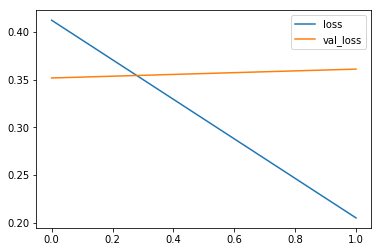

157/157 - 1s
              precision    recall  f1-score   support

    negative       0.89      0.91      0.90      3423
    positive       0.75      0.71      0.73      1287

    accuracy                           0.86      4710
   macro avg       0.82      0.81      0.82      4710
weighted avg       0.85      0.86      0.85      4710



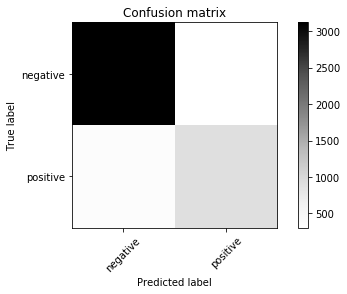

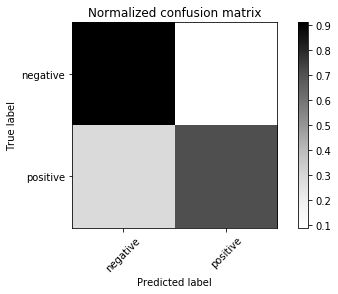

In [4]:
#LSTM https://www.kaggle.com/monsterspy/conv-lstm-sentiment-analysis-keras-acc-0-96

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import LSTM
from keras.layers import Conv1D, MaxPooling1D
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import model_from_json
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD


import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Flatten, Dense, Activation
from keras.utils.np_utils import to_categorical

from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import confusion_matrix

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import LSTM
from keras.layers import Conv1D, MaxPooling1D
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import model_from_json
import re
import warnings
warnings.filterwarnings('ignore')



data = pd.read_csv(r'C:\Users\MONSTER\Desktop\3.1dönem\makina öğrenmesi proje\nisan_2020.csv') 

data=data[data.Sentiment_Analysis !=0]
print(data.Sentiment_Analysis.value_counts())

#Embedding
max_features=20000
maxlen=100
embedding_size=128

#Convolution
kernel_size=5
filters=64
pool_size=4

lstm_output_size=70

batch_size=30
epochs=2

for idx,row in data.iterrows():
    row[0] = row[0].replace('rt',' ')
    
    

tokenizer=Tokenizer(nb_words=max_features,split=' ')
tokenizer.fit_on_texts(data['Description'].values)
X=tokenizer.texts_to_sequences(data['Description'].values)
X=pad_sequences(X, maxlen = maxlen)

Y=pd.get_dummies(data['Sentiment_Analysis']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.25, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)



class PlotLosses(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []

        self.fig = plt.figure()

        self.logs = []

    def on_epoch_end(self, epoch, logs={}):

        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.i += 1

        clear_output(wait=True)
        plt.plot(self.x, self.losses, label="loss")
        plt.plot(self.x, self.val_losses, label="val_loss")
        plt.legend()
        plt.show();

plot_losses = PlotLosses()





model = Sequential()
model.add(Embedding(max_features, embedding_size, input_length=maxlen))
model.add(Dropout(0.25))
model.add(Conv1D(filters, kernel_size, padding='valid', activation='relu', strides=1))
model.add(MaxPooling1D(pool_size=pool_size))
model.add(LSTM(lstm_output_size))
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs,shuffle=True, validation_data=(X_test, Y_test),callbacks=[plot_losses],verbose = 0)

yhat = model.predict(X_test, verbose = 2, batch_size = batch_size)

from sklearn import metrics
print(metrics.classification_report(Y_test[:,1], np.round(yhat[:,1]) ,target_names = ["negative", "positive"]))








import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

score = ['negative', 'positive']

def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Greys):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(set(score)))
    plt.xticks(tick_marks, score, rotation=45)
    plt.yticks(tick_marks, score)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
# Compute confusion matrix
cm = confusion_matrix(Y_test[:,1], np.round(yhat[:,1]))
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cm)    

cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()
